In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("./paperimages/Net.xlsx", "Sheet1")
df

,SNN1,SNN2,SNN3,BNN
0,1.636667,1.108333,5.158333,1.705000
1,9.081667,0.546667,118.988333,2.750000
2,0.996667,0.823333,2.401667,5.130000
3,1.846667,0.855000,13.121667,0.795000
4,0.716667,1.443333,1.670000,3.733333
...,...,...,...,...
932,7.928333,NaN,NaN,NaN
933,1.771667,NaN,NaN,NaN
934,0.725000,NaN,NaN,NaN
935,0.923333,NaN,NaN,NaN


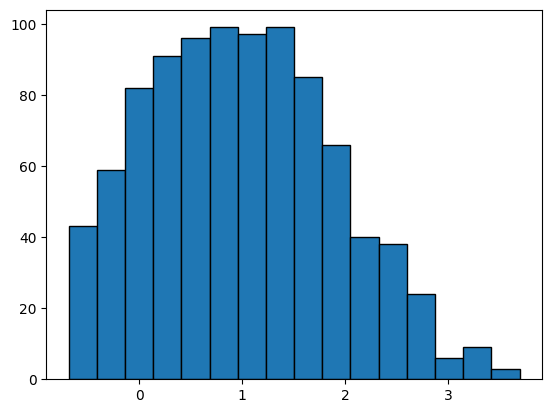

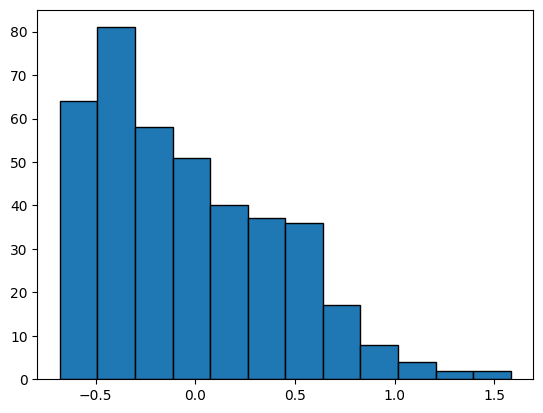

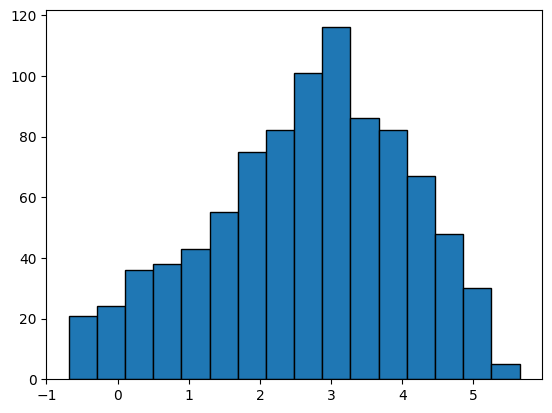

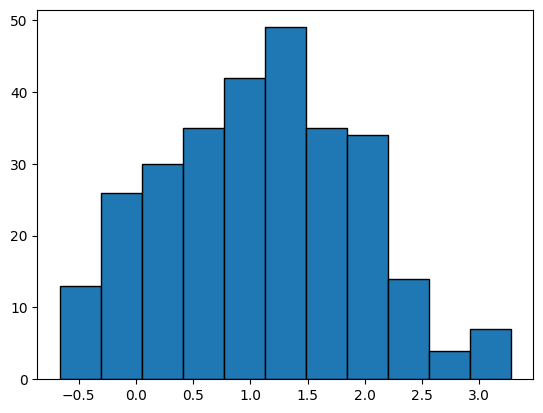

In [2]:
plt.hist(np.log(df['SNN1']), bins='auto', histtype='bar', ec='k') 
# plt.xlabel("Residuals")
# plt.ylabel('Frequency')
plt.show()
plt.hist(np.log(df['SNN2']), bins='auto', histtype='bar', ec='k') 
# plt.xlabel("Residuals")
# plt.ylabel('Frequency')
plt.show()
plt.hist(np.log(df['SNN3']), bins='auto', histtype='bar', ec='k') 
# plt.xlabel("Residuals")
# plt.ylabel('Frequency')
plt.show()
plt.hist(np.log(df['BNN']), bins='auto', histtype='bar', ec='k') 
# plt.xlabel("Residuals")
# plt.ylabel('Frequency')
plt.show()

In [3]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['SNN1', 'SNN2', 'SNN3', 'BNN'])
df_melt

,index,variable,value
0,0,SNN1,1.636667
1,1,SNN1,9.081667
2,2,SNN1,0.996667
3,3,SNN1,1.846667
4,4,SNN1,0.716667
...,...,...,...
3743,932,BNN,NaN
3744,933,BNN,NaN
3745,934,BNN,NaN
3746,935,BNN,NaN


In [4]:
df_melt.columns = ['index', 'network', 'value']
df_melt

,index,network,value
0,0,SNN1,1.636667
1,1,SNN1,9.081667
2,2,SNN1,0.996667
3,3,SNN1,1.846667
4,4,SNN1,0.716667
...,...,...,...
3743,932,BNN,NaN
3744,933,BNN,NaN
3745,934,BNN,NaN
3746,935,BNN,NaN


In [5]:
# Example 2: Reset index after drop
df_melt=df_melt.dropna().reset_index(drop=True)
df_melt

,index,network,value
0,0,SNN1,1.636667
1,1,SNN1,9.081667
2,2,SNN1,0.996667
3,3,SNN1,1.846667
4,4,SNN1,0.716667
...,...,...,...
2530,284,BNN,1.011667
2531,285,BNN,1.580000
2532,286,BNN,2.983333
2533,287,BNN,6.465000


In [6]:
df_melt['value']=np.log(df_melt['value'])
df_melt

,index,network,value
0,0,SNN1,0.492662
1,1,SNN1,2.206258
2,2,SNN1,-0.003339
3,3,SNN1,0.613382
4,4,SNN1,-0.333144
...,...,...,...
2530,284,BNN,0.011599
2531,285,BNN,0.457425
2532,286,BNN,1.093041
2533,287,BNN,1.866403


In [7]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df_melt[df_melt['network'].isin(['SNN1'])]['value'], df_melt[df_melt['network'].isin(['SNN2'])]['value'],
                                df_melt[df_melt['network'].isin(['SNN3'])]['value'], df_melt[df_melt['network'].isin(['BNN'])]['value'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

733.1252378738517 0.0


In [7]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(network)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
# output (ANOVA F and p value)
#                 sum_sq    df         F    PR(>F)
# C(treatments)  3010.95   3.0  17.49281  0.000026
# Residual        918.00  16.0       NaN       NaN

,sum_sq,df,F,PR(>F)
C(network),2435.705808,3.0,733.125238,0.0
Residual,2802.964206,2531.0,NaN,NaN


In [9]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(network)')
res.anova_summary
# output (ANOVA F and p value)
#                  df   sum_sq   mean_sq         F    PR(>F)
# C(treatments)   3.0  3010.95  1003.650  17.49281  0.000026
# Residual       16.0   918.00    57.375       NaN       NaN

# note: if the data is balanced (equal sample size for each group), Type 1, 2, and 3 sums of squares
# (typ parameter) will produce similar results.

,df,sum_sq,mean_sq,F,PR(>F)
C(network),3.0,2435.705808,811.901936,733.125238,0.0
Residual,2531.0,2802.964206,1.107453,NaN,NaN


In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
                        
multiple_comp_result = pairwise_tukeyhsd(endog=df_melt['value'], groups=df_melt['network'], alpha=0.05)
print(multiple_comp_result.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   BNN   SNN1  -0.1017 0.477 -0.2837  0.0804  False
   BNN   SNN2  -1.1323   0.0 -1.3412 -0.9235   True
   BNN   SNN3   1.5598   0.0  1.3771  1.7424   True
  SNN1   SNN2  -1.0307   0.0 -1.1923 -0.8691   True
  SNN1   SNN3   1.6614   0.0  1.5355  1.7874   True
  SNN2   SNN3   2.6921   0.0  2.5298  2.8544   True
---------------------------------------------------


In [10]:
'''non runnare perchè non funziona'''

# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='network', anova_model='value ~ C(network)')
res.tukey_summary
# output
#   group1 group2  Diff      Lower      Upper   q-value   p-value
# 0      A      B  15.4   1.692871  29.107129  4.546156  0.025070
# 1      A      C   1.6 -12.107129  15.307129  0.472328  0.900000
# 2      A      D  30.4  16.692871  44.107129  8.974231  0.001000
# 3      B      C  13.8   0.092871  27.507129  4.073828  0.048178
# 4      B      D  15.0   1.292871  28.707129  4.428074  0.029578
# 5      C      D  28.8  15.092871  42.507129  8.501903  0.001000

# Note: p-value 0.001 from tukey_hsd output should be interpreted as <=0.001

c:\Users\Giuseppe\Desktop\code\codes\3.SNNvsBNN\Master_Thesis\Lib\site-packages\bioinfokit\analys.py:60: SyntaxWarning: invalid escape sequence '\s'
  fasta_header = re.split("\s+", fasta_header)[0]
c:\Users\Giuseppe\Desktop\code\codes\3.SNNvsBNN\Master_Thesis\Lib\site-packages\bioinfokit\analys.py:1417: SyntaxWarning: invalid escape sequence '\s'
  line = re.split('\s+', line.strip())
c:\Users\Giuseppe\Desktop\code\codes\3.SNNvsBNN\Master_Thesis\Lib\site-packages\bioinfokit\analys.py:1465: SyntaxWarning: invalid escape sequence '\s'
  line = re.split('\s+', line.strip())
c:\Users\Giuseppe\Desktop\code\codes\3.SNNvsBNN\Master_Thesis\Lib\site-packages\bioinfokit\analys.py:2334: SyntaxWarning: invalid escape sequence '\{'
  df2_glist = df1_glist.replace('(^\{|\}$)', '', regex=True)
c:\Users\Giuseppe\Desktop\code\codes\3.SNNvsBNN\Master_Thesis\Lib\site-packages\bioinfokit\analys.py:2549: SyntaxWarning: invalid escape sequence '\{'
  genfam.allowed_ids(df['array_agg'].iloc[0].strip('\{').s

TypeError: Could not convert ['SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1SNN1'] to numeric

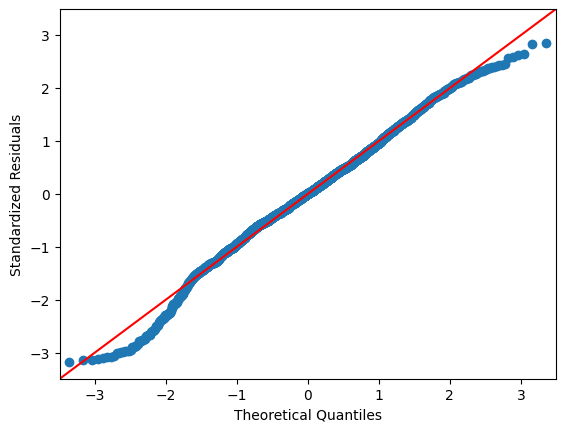

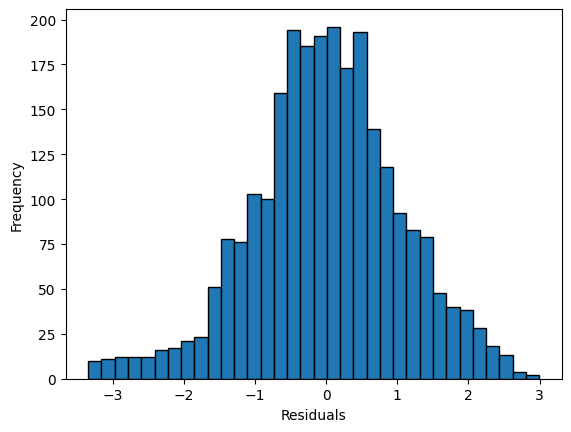

In [11]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [8]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)
# 0.9685019850730896 0.7229772806167603

0.9935999512672424 4.403589493051641e-09


In [13]:
import scipy.stats as stats
w, pvalue = stats.bartlett( df_melt[df_melt['network'].isin(['SNN1'])]['value'], df_melt[df_melt['network'].isin(['SNN2'])]['value'],
                            df_melt[df_melt['network'].isin(['SNN3'])]['value'], df_melt[df_melt['network'].isin(['BNN'])]['value'])
print(w, pvalue)
# 5.687843565012841 0.1278253399753447

# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the bartlett's test
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=df_melt, res_var='value', xfac_var='network')
res.bartlett_summary
# output
#                  Parameter   Value
# 0      Test statistics (T)  5.6878
# 1  Degrees of freedom (Df)  3.0000
# 2                  p value  0.1278

583.997791998821 2.967414173375784e-126


,Parameter,Value
0,Test statistics (T),583.9978
1,Degrees of freedom (Df),3.0000
2,p value,0.0000


In [14]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the Levene's test
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df_melt, res_var='value', xfac_var='network')
res.levene_summary
# output
#                  Parameter   Value
# 0      Test statistics (W)  1.9220
# 1  Degrees of freedom (Df)  3.0000
# 2                  p value  0.1667

,Parameter,Value
0,Test statistics (W),153.9258
1,Degrees of freedom (Df),3.0000
2,p value,0.0000
